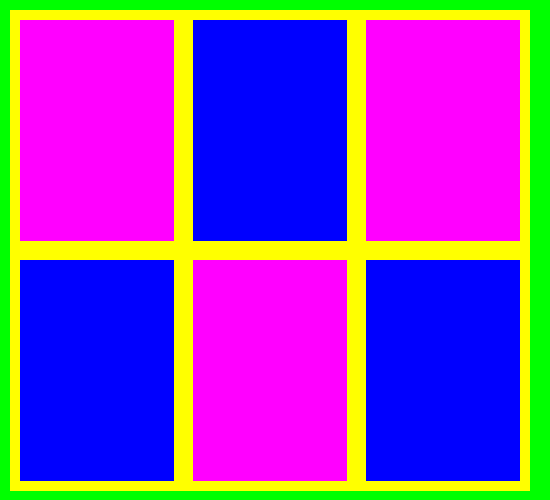

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# Dimensiones de la imagen y de los cuadros
width, height = 550, 500
rows, cols = 2, 3
border = 10  # Espacio amarillo entre cuadros
box_width = (width - border * (cols)) // cols
box_height = (height - border * (rows)) // rows

# Colores
background_color = (0, 255, 0)  # Verde
border_color = (255, 255, 0)    # Amarillo
magenta_color = (255, 0, 255)   # Magenta
blue_color = (0, 0, 255)        # Azul

# Crear una imagen con fondo verde
image = Image.new('RGB', (width, height), background_color)
draw = ImageDraw.Draw(image)

# Lista de colores por posición en la cuadrícula (fila, columna)
# Updated colors dictionary to include all positions in the grid
colors = {
    (0, 0): magenta_color,
    (0, 1): blue_color,
    (0, 2): magenta_color, # Added color for (0, 2)
    (1, 0): blue_color,
    (1, 1): magenta_color,
    (1, 2): blue_color,  # Added color for (1, 2)
}

# Dibujar los cuadros con el borde amarillo entre ellos
for row in range(rows):
    for col in range(cols):
        x0 = col * (box_width) + border
        y0 = row * (box_height) + border
        x1 = x0 + box_width
        y1 = y0 + box_height
        draw.rectangle([x0, y0, x1, y1], fill=colors[(row, col)], outline=border_color, width=border)


display(image)

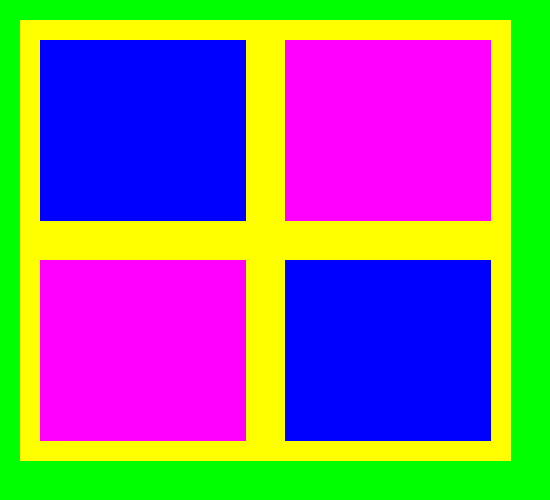

In [ ]:
# Dimensiones de la imagen y de los cuadros
width, height = 550, 500
rows, cols = 2, 2
border = 20  # Espacio amarillo entre cuadros
box_width = (width - border * (cols + 1)) // cols
box_height = (height - border * (rows + 1)) // rows

# Colores
background_color = (0, 255, 0)  # Verde
border_color = (255, 255, 0)    # Amarillo
blue_color = (0, 0, 255)        # Azul
magenta_color = (255, 0, 255)   # Magenta

# Crear una imagen con fondo verde
image = Image.new('RGB', (width, height), background_color)
draw = ImageDraw.Draw(image)

# Lista de colores por posición en la cuadrícula (fila, columna)
colors = {
    (0, 0): blue_color,     # Primer cuadro (arriba a la izquierda)
    (0, 1): magenta_color,  # Segundo cuadro (arriba a la derecha)
    (1, 0): magenta_color,  # Tercer cuadro (abajo a la izquierda)
    (1, 1): blue_color      # Cuarto cuadro (abajo a la derecha)
}

# Dibujar los cuadros con el borde amarillo entre ellos
for row in range(rows):
    for col in range(cols):
        x0 = col * (box_width) + border
        y0 = row * (box_height) + border
        x1 = x0 + box_width
        y1 = y0 + box_height
        draw.rectangle([x0, y0, x1, y1], fill=colors[(row, col)], outline=border_color, width=border)

display(image)


In [ ]:
!pip install opencv-python-headless


--2024-10-29 23:51:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg/220px-Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22109 (22K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  21.59K  --.-KB/s    in 0.03s   

2024-10-29 23:51:21 (683 KB/s) - ‘messi.jpg’ saved [22109/22109]



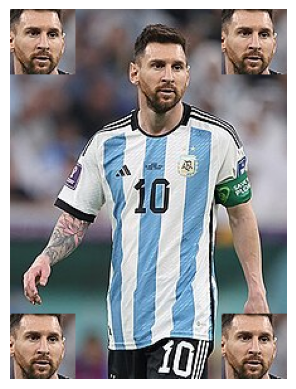

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# URL de la imagen
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg/220px-Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg'
image_path = 'messi.jpg'

# Descargar la imagen
!wget {url} -O {image_path}

# Cargar el clasificador de rostros preentrenado
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Leer la imagen y convertirla a RGB para matplotlib
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]

# Convertir la imagen a escala de grises para detección de rostros
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar el rostro en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Si se detecta un rostro, extraer la región de la cabeza
if len(faces) > 0:
    x, y, w, h = faces[0]  # Primer rostro detectado
    head = image_rgb[y:y+h, x:x+w]  # Extraer la región de la cabeza

    # Crear una copia de la imagen para colocar las cabezas en las esquinas
    result_image = image_rgb.copy()

    # Posiciones de las esquinas
    corners = [(0, 0), (width - w, 0), (0, height - h), (width - w, height - h)]

    # Colocar la cabeza en cada esquina
    for (cx, cy) in corners:
        result_image[cy:cy+h, cx:cx+w] = head

    plt.imshow(result_image)
    plt.axis('off')
    plt.show()
else:
    print("No se detectó ningún rostro en la imagen.")


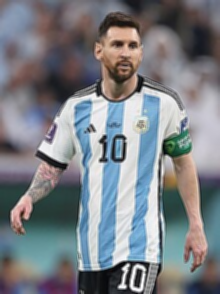

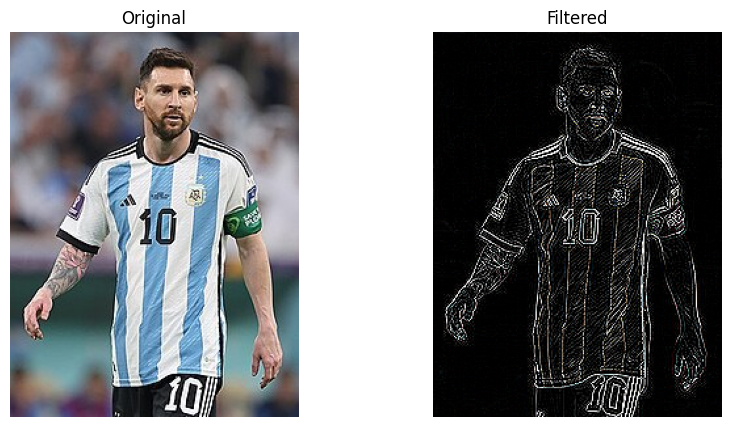

In [ ]:
!pip install opencv-python-headless
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow # Import cv2_imshow

# URL de la imagen
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg/220px-Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg'
image_path = 'messi.jpg'

# Define a kernel (example - a simple blur)
kernel_1 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]]) / 9

# Apply filter using cv2.filter2D (cv2 is the imported module)
Filtro = cv2.filter2D(image, -1, kernel_1)

# Display the filtered image using cv2_imshow instead of cv2.imshow
cv2_imshow(Filtro) # Use cv2_imshow to display the image

# cv2.waitKey(0)  # Wait for a key press - Not needed in Colab
# cv2.destroyAllWindows() # Close the window - Not needed in Colab

# aplicar kernel a la imagen
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
filtered_image = cv2.filter2D(image, -1, kernel)

# Mostrar las imágenes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Filtered")
axes[1].axis('off')

plt.show()

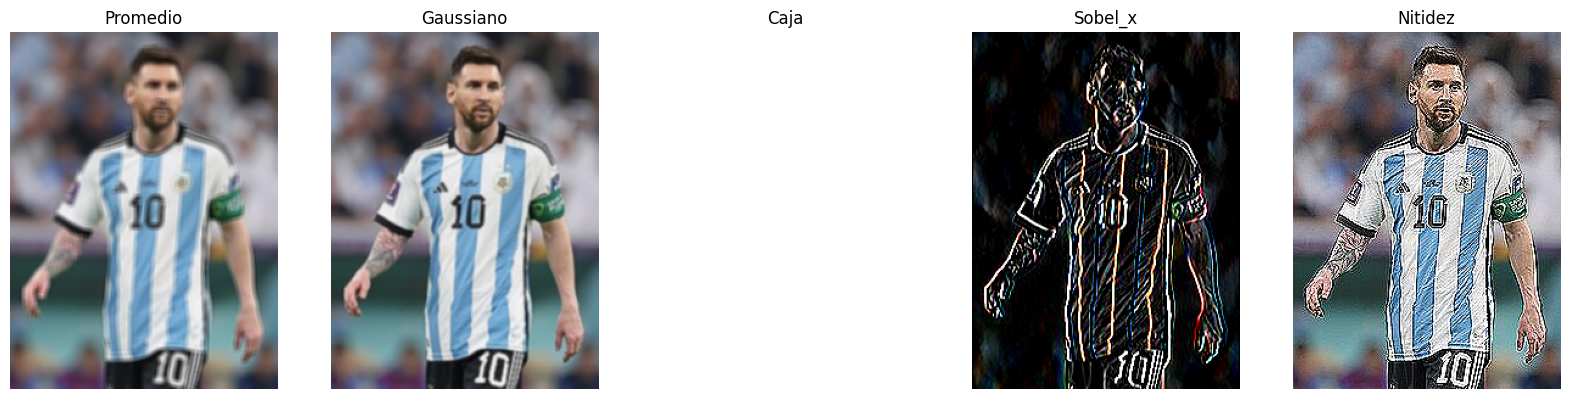

In [ ]:
import requests
from io import BytesIO

# Descargar la imagen desde el enlace
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg/220px-Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg"
response = requests.get(url)
image = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir kernels para cada filtro
kernels = {
    'promedio': np.ones((5, 5), np.float32) / 25,
    'gaussiano': cv2.getGaussianKernel(5, sigma=1) @ cv2.getGaussianKernel(5, sigma=1).T,
    'caja': np.ones((5, 10), np.float32),
    'sobel_x': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32),
    'nitidez': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
}

# Aplicar filtros
filtered_images = {}
for filter_name, kernel in kernels.items():
    filtered_images[filter_name] = cv2.filter2D(image, -1, kernel)

# Mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
filter_names = list(kernels.keys())
for i, ax in enumerate(axes):
    ax.imshow(filtered_images[filter_names[i]])
    ax.set_title(filter_names[i].capitalize())
    ax.axis('off')

plt.show()


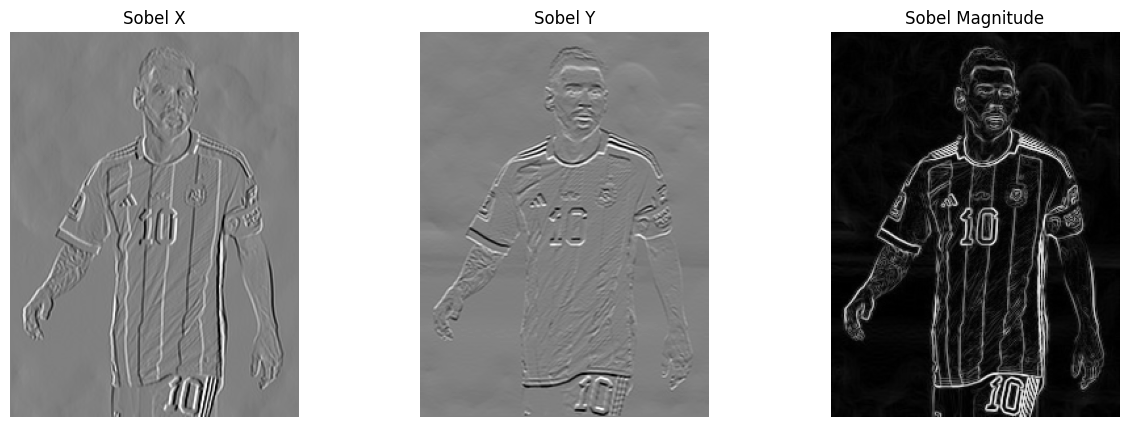

In [ ]:
# Descargar la imagen desde el enlace
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg/220px-Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg"
response = requests.get(url)
image = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)  # Convertir a escala de grises para los filtros Sobel

# Aplicar Sobel en dirección X y Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel en X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel en Y

# Calcular la magnitud de los bordes combinando X y Y
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(sobel_x, cmap='gray')
axes[0].set_title("Sobel X")
axes[0].axis('off')

axes[1].imshow(sobel_y, cmap='gray')
axes[1].set_title("Sobel Y")
axes[1].axis('off')

axes[2].imshow(sobel_magnitude, cmap='gray')
axes[2].set_title("Sobel Magnitude")
axes[2].axis('off')

plt.show()
